In [ ]:
 
from google.colab import files
uploaded=files.upload()

Saving credit.csv to credit.csv


In [ ]:
import pandas as pd 
#loading data
data=pd.read_csv("credit.csv")
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5,6,11,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


In [ ]:
data= data[['Product', 'Consumer complaint narrative']]#updating dataframe with relevant columns
data.columns = ['Product', 'complaint'] 
data.head()

,Product,complaint
0,Checking or savings account,NaN
1,Checking or savings account,NaN
2,Debt collection,NaN
3,"Credit reporting, credit repair services, or o...",NaN
4,Checking or savings account,NaN


In [ ]:
data= data[pd.notnull(data['complaint'])]#removing missing values
data.head()

,Product,complaint
29904,"Credit reporting, credit repair services, or o...",The Summer of XX/XX/2018 I was denied a mortga...
30629,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...
30735,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...
30795,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...
30807,"Credit reporting, credit repair services, or o...",There are many mistakes appear in my report wi...


In [ ]:
data.replace({'Product':{
             'Credit reporting, credit repair services, or other personal consumer reports':'Credit', 
             'Credit reporting': 'Credit',
             'Credit card': 'Credit',
             'Prepaid card': 'Credit',
             'Credit card or prepaid card':'Credit',
             'Student loan':'Loan',
             'Consumer Loan':'Loan',
             'Payday loan, title loan, or personal loan':'Loan',
             'Payday loan': 'Loan',
             'Debt collection':'Loan',
             'Mortgage':'Loan',
             'Vehicle loan or lease':'Loan',
             'Checking or savings account':'Money transfer, virtual currency, or money service',
             'Bank account or service':'Money transfer, virtual currency, or money service',
             'Money transfers': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service',
             'Other financial service':'Money transfer, virtual currency, or money service'}}, 
            inplace= True)#renaming categories

In [ ]:
data['Product'].value_counts()# number of values for each category

Loan                                                  182894
Credit                                                165633
Money transfer, virtual currency, or money service     35037
Name: Product, dtype: int64

In [ ]:
data['category'] = data['Product'].factorize()[0]#encoding categories
cid = data[['Product', 'category']].drop_duplicates().sort_values('category')#creating dictionaries
cti= dict(cid.values)
itc= dict(cid[['category', 'Product']].values)
data.tail()

,Product,complaint,category
912543,Credit,Mel S. Harris & assoc. used deceptive collecti...,0
912546,Loan,Portfolio Recovery has been reporting a collec...,1
912550,Loan,I KEEP RECEIVING PHONE CALLS FRON NORTHEAST RE...,1
912552,Credit,account reported as discharged through bankrup...,0
912553,Loan,I currently have a mortgage with Flag star ban...,1


In [ ]:
data['category'].value_counts()

1    182894
0    165633
2     35037
Name: category, dtype: int64

In [ ]:
data= data.sample(5000, random_state=1)#sampling of data as computation is time consuming
from sklearn.feature_extraction.text import TfidfVectorizer# transforming complaints into vectors
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2),stop_words='english')
features = tfidf.fit_transform(data.complaint).toarray()
labels = data.category
print(features.shape)

(5000, 14121)


In [ ]:
#splitting data and training model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(data['complaint'], data['Product'],test_size=0.4, random_state = 0)
X_train_counts =CountVectorizer().fit_transform(X_train)
X_train_tfidf =TfidfTransformer().fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
data= data.sample(5000, random_state=1)
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,labels,data.index, test_size=0.25,random_state=1)
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics #various classification metrics 
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred,target_names= data['Product'].unique()))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))
print("MCC:",metrics.matthews_corrcoef(y_test, y_pred))

				CLASSIFICATIION METRICS

                                                    precision    recall  f1-score   support

                                            Credit       0.84      0.81      0.82       555
                                              Loan       0.74      0.92      0.82       573
Money transfer, virtual currency, or money service       1.00      0.01      0.02       122

                                          accuracy                           0.78      1250
                                         macro avg       0.86      0.58      0.55      1250
                                      weighted avg       0.81      0.78      0.74      1250

Accuracy: 0.7808
Precision: 0.7808
Recall: 0.7808
MCC: 0.6145804823349764


In [ ]:
conf=metrics.confusion_matrix(y_test, y_pred,labels=[0,1,2])#confusion matrix
print(conf)

[[449 106   0]
 [ 47 526   0]
 [ 41  80   1]]


[]

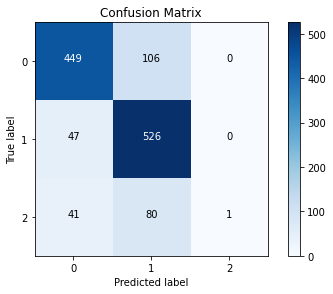

In [ ]:
import matplotlib.pyplot as plt #confusion matrix visualisation
import itertools
import numpy as np
plt.rcParams['axes.grid'] = False
classes = [0,1,2]
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = conf.max() / 2.
fmd='d'
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j],fmd),horizontalalignment="center",color="white" if conf[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.plot()

In [ ]:
from sklearn.metrics import roc_curve #roc curve
pred_prob1=model.predict_proba(X_test)
fpr1,tpr1,thresh1=roc_curve(y_test,pred_prob1[:,1],pos_label=1)
rp=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,rp,pos_label=1)

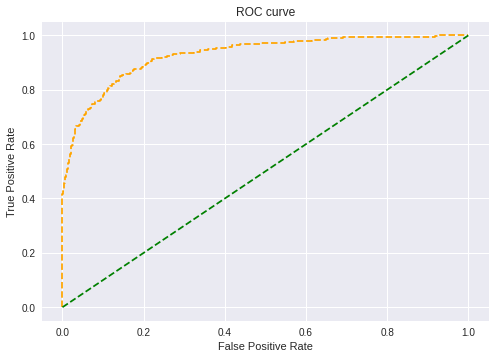

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='Multinomial Naive Bayes')
plt.plot(p_fpr,p_tpr,linestyle='--',color='green')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**OUTPUTS:**


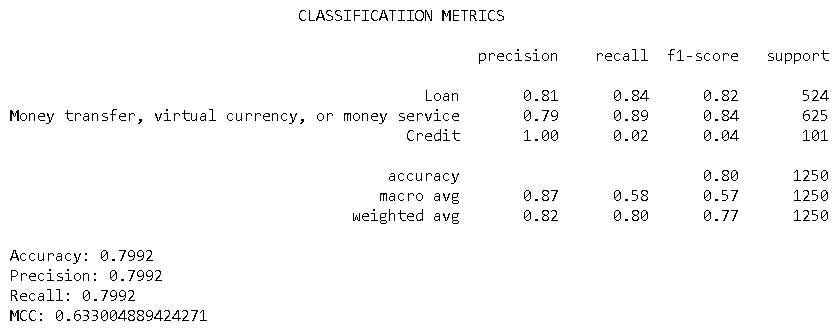

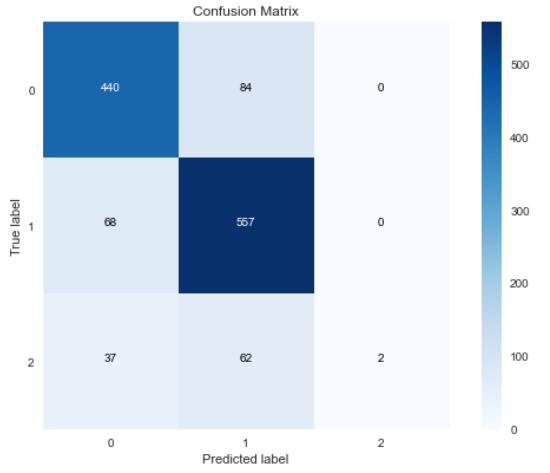

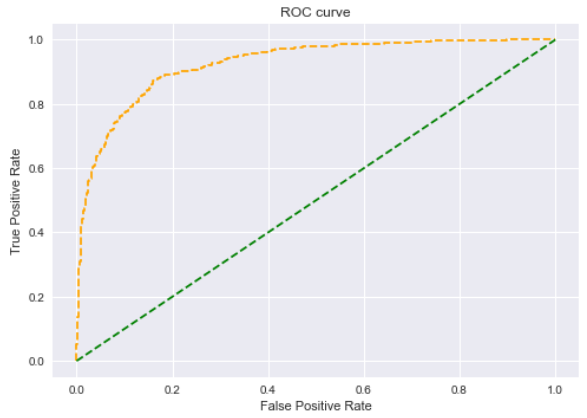


**Inference:**
F1 -score is a better classification metric than accuracy for this model.